/tmp/ipykernel_15842/2826989165.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_15842/2826989165.py:39: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_15842/2826989165.py:39: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_15842/2826989165.py:39: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_15842/2826989165.py:39: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_15842/2826989165.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_15842/28

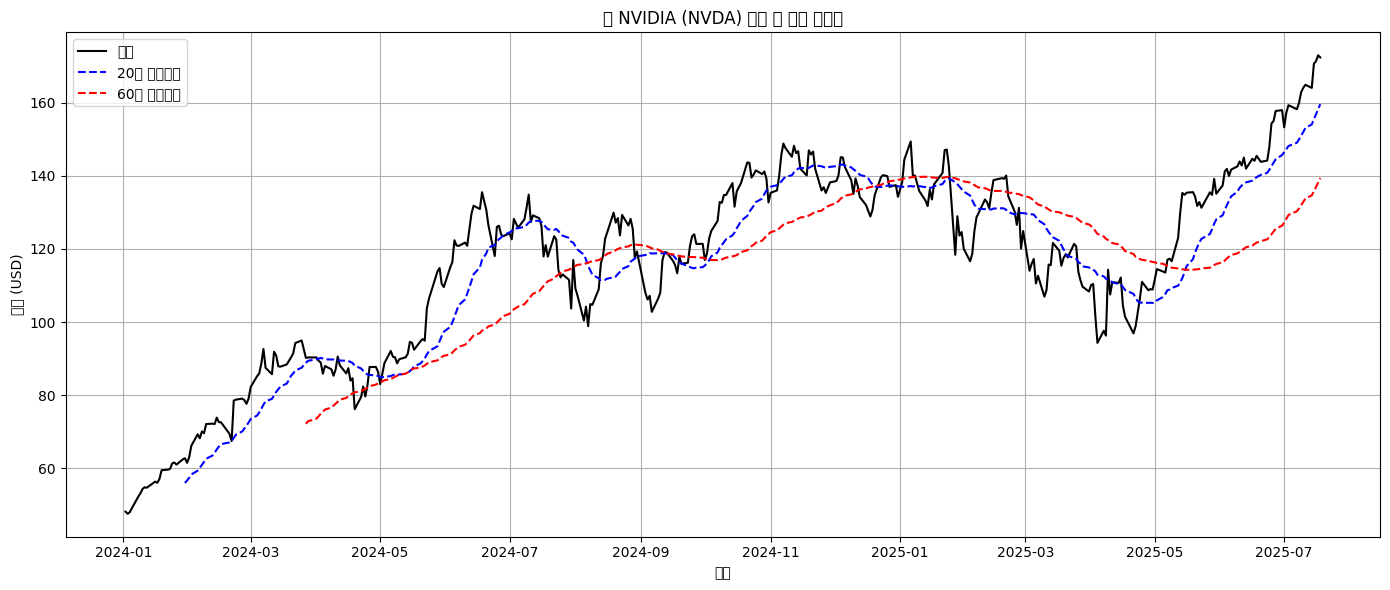

📊 GPT 주가 분석 결과:
1. 주가의 전반적인 추세를 보면, NVIDIA의 주가는 최근 30일간 전반적으로 상승세를 보이고 있습니다. 특히, 2025년 6월 24일부터 7월 18일까지 주가가 빠르게 상승하는 모습을 볼 수 있습니다. 이는 회사의 성장 가능성에 대한 투자자들의 긍정적인 반응을 반영한 것으로 보입니다.

2. 투자자 입장에서 유의할 점은, 주가의 급격한 상승으로 인해 현재 주가가 과도하게 높아질 수 있음을 주의해야 합니다. 이는 투자자가 높은 가격에 매입하여 이익을 얻기 어려울 수 있다는 의미입니다. 또한, 주가의 변동성이 높아질 수 있으므로 주식 투자에 따른 위험도 증가할 수 있습니다.

3. 현재 시점에서의 간단한 투자 의견은, NVIDIA의 주가가 상승세를 보이고 있으나, 주가의 현재 수준이 과도하게 높다는 점을 고려하여, 적절한 타이밍을 기다린 후 매입하는 것이 좋을 것으로 보입니다. 또한, NVIDIA의 장기적인 성장 가능성과 업계 내 위치, 그리고 시장 환경 등을 고려한 종합적인 분석이 필요합니다.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from openai import OpenAI
from dotenv import load_dotenv  # 🔄 추가된 부분

# 🔐 OpenAI API 키 가져오기
load_dotenv()  # .env 파일에서 환경변수 읽기

api_key = os.getenv("OPENAI_API_KEY")  # 변수명 수정
if api_key is None:
    raise ValueError("❌ OPENAI_API_KEY 환경변수가 설정되지 않았습니다.")

client = OpenAI(api_key=api_key)

# 날짜 설정
start_date = "2024-01-01"
end_date = "2025-07-20"
ticker = "NVDA"  # NVIDIA

# NVIDIA 주가 데이터 가져오기
df = yf.download(ticker, start=start_date, end=end_date)

# 이동 평균선 계산
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA60"] = df["Close"].rolling(window=60).mean()

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="종가", color='black')
plt.plot(df.index, df["MA20"], label="20일 이동평균", linestyle="--", color='blue')
plt.plot(df.index, df["MA60"], label="60일 이동평균", linestyle="--", color='red')
plt.title("📈 NVIDIA (NVDA) 주가 및 이동 평균선")
plt.xlabel("날짜")
plt.ylabel("가격 (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 최근 30일 종가 데이터 추출
recent_df = df[["Close"]].tail(30)

# 텍스트로 변환
summary_text = recent_df.to_string()

# GPT 프롬프트
prompt = f"""
다음은 최근 30일간 NVIDIA(NVDA)의 종가 데이터입니다:\n\n{summary_text}

이 데이터를 기반으로 아래 항목을 분석해 주세요:
1. 주가의 전반적인 추세는 어떤가요?
2. 투자자 입장에서 유의할 점은 무엇인가요?
3. 현재 시점에서의 간단한 투자 의견을 알려주세요.
"""

# GPT 분석 요청
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "당신은 미국 주식 분석 전문가입니다. 한국어로 설명해주세요."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7
)

# 결과 출력
analysis = response.choices[0].message.content
print("=" * 60)
print("📊 GPT 주가 분석 결과:")
print("=" * 60)
print(analysis)
print("=" * 60)
